<a href="https://colab.research.google.com/github/ShotaSasaki-HCU/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【3. Netflix上でのリリース日からの年数と10タイトル中の順位の関係】


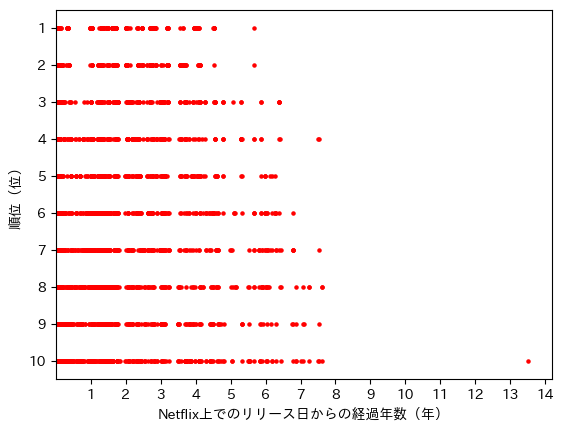

上位に行くほど、比較的リリースから時間が経っていない作品が大きな割合を占めるという、非常に弱い相関がある。


In [133]:
# Pandas
# output.clear() # 出力画面をクリアする。

import pandas as pd
from google.colab import output # 出力画面クリア用
import datetime
from matplotlib import pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib

# header=0として、csvの１行目は列名と指定する。
df = pd.read_csv('https://raw.githubusercontent.com/ShotaSasaki-HCU/Prog2kakushin/main/netflix%20daily%20top%2010.csv', header=0)

separate = '-----------------------------------------------------------' # 区切り横線
functions = ["トップ10入り合計日数ランキング", "最大連続トップ10入り日数ランキング", "Netflix上でのリリース日からの年数と10タイトル中の順位の関係"] # 機能一覧を格納するリストfunctions
error_enable = False # 選択肢範囲外をユーザが選択したとき用のフラグ
while True:
  output.clear() # 選択肢範囲外を選択し、戻ってきた場合のため出力画面をクリアする。
  print("【2020年4月1日〜2022年3月11日のNetflixランキング分析】")
  for i, function in enumerate(functions): # リストfunctionsを箇条書きで列挙する。
    print(str(i+1) + '.', function)
  if error_enable:
    print("[エラー]1~" + str(len(functions)) + "の範囲で入力してください。")
  select = int(input(separate + "\n選択肢の番号を入力："))
  if not(1 <= select <= len(functions)): # 選択肢範囲外をユーザが指定したらwhile文の先頭まで戻る。
    error_enable = True
    continue
  error_enable = False

  # 1. トップ10入り合計日数ランキング
  if select == 1:
    df_title = df['Title'].value_counts(sort=True) # ユニークな要素のそれぞれの出現回数を得る。（降順）
    while True: # ユーザインターフェース
      output.clear() # 画面遷移のため、出力画面をクリアする。
      print("【1. トップ10入り合計日数ランキング】")
      if error_enable:
        print("[エラー]1~" + str(len(df_title)) + "の範囲で入力してください。")
      limit = int(input("上位何位(1~" + str(len(df_title)) + ")まで表示しますか？："))
      if not(1 <= limit <= len(df_title)): # 選択肢範囲外をユーザが指定したらwhile文の先頭まで戻る。
        error_enable = True
        continue
      error_enable = False
      break
    titles = df_title[0:limit].index.values # 出現回数が格納されたSeriesの行名（作品タイトル）をリスト化
    print('   ' + 'Title'.center(30) + ':\t出現日数（／' + str(int(len(df)/10)) + '日）\n' + separate)
    for i in range(len(titles)):
      print(str(i+1) + '. ' + titles[i].center(30) + ':\t' + str(df_title[0:limit][i]).center(16))

  # 2. 最大連続トップ10入り日数ランキング
  elif select == 2:
    titles = list(df['Title'].unique()) # 作品タイトルの列を重複無しで抽出してリスト化する。
    in_a_row_temp = dict(zip(titles, [0]*len(titles))) # 暫定的な連続日数の辞書（キーはタイトル・値は日数）
    in_a_row_final = dict(zip(titles, [0]*len(titles))) # 最大連続日数の辞書（キーはタイトル・値は日数）

    top10_yesterday = list(df['Title'][0:10]) # 前の日付の10タイトルを格納するリスト
    for i in range(10, len(df), 10): # 1日ずつ見ていく。
      top10_today = list(df['Title'][i:i+10]) # 現在の日付の10タイトルをリストにする。
      for title_yesterday in top10_yesterday: # 前の日付のタイトルが、
        if title_yesterday in top10_today: # 現在の日付の10タイトルに残っていたら、
          in_a_row_temp[title_yesterday] += 1 # それを連続として加算する。
        else: # 前の日付のタイトルが、現在の日付の10タイトルに残っていなかったら、
          if in_a_row_temp[title_yesterday] > in_a_row_final[title_yesterday]: # 暫定的な連続日数が、今までの連続日数を超えていたら、
            in_a_row_final[title_yesterday] = in_a_row_temp[title_yesterday] # 最大連続日数を、暫定的だった連続日数で書き換える。
          in_a_row_temp[title_yesterday] = 0 # 連続が途切れたので、暫定的な連続日数をリセットする。
      top10_yesterday = top10_today # 現在の日付の処理が終わったら、現在のタイトルを前のタイトルとして記録する。
    in_a_row_final_sorted = sorted(in_a_row_final.items(), key=lambda v: v[1], reverse=True) # 最大連続日数について降順でソート

    while True: # ユーザインターフェース
      output.clear() # 画面遷移のため、出力画面をクリアする。
      print("【2. 最大連続トップ10入り日数ランキング】")
      if error_enable:
        print("[エラー]1~" + str(len(in_a_row_final_sorted)) + "の範囲で入力してください。")
      limit = int(input("上位何位(1~" + str(len(in_a_row_final_sorted)) + ")まで表示しますか？："))
      if not(1 <= limit <= len(in_a_row_final_sorted)): # 選択肢範囲外をユーザが指定したらwhile文の先頭まで戻る。
        error_enable = True
        continue
      error_enable = False
      break
    print('   ' + 'Title'.center(30) + ':\t最大連続日数\n' + separate)
    for i in range(limit):
      print(str(i+1) + '. ' + in_a_row_final_sorted[i][0].center(30) + ':\t' + str(in_a_row_final_sorted[i][1]).center(11))

  # 3. Netflix上でのリリース日からの年数と10タイトル中の順位の関係
  elif select == 3:
    output.clear() # 画面遷移のため、出力画面をクリアする。
    print("【3. Netflix上でのリリース日からの年数と10タイトル中の順位の関係】")
    # トップ10入りの日時をdatetime型に変換する。
    df['As of'] = pd.to_datetime(df['As of']).dt.date
    # 作品のリリース日時をdatetime型に変換する。
    abbre_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12} # 月の略を数字に変換するための辞書
    for key, value in abbre_dict.items():
      df['Netflix Release Date'] = df['Netflix Release Date'].replace(key, str(value), regex=True)
    df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'], format='%m %d, %Y').dt.date

    df['date_diff'] = (df['As of'] - df['Netflix Release Date'])
    df['date_diff'] = df['date_diff'].dt.days

    plt.scatter(df['date_diff'], df['Rank'], s=5, c='r')
    plt.xlabel('Netflix上でのリリース日からの経過年数（年）')
    plt.xlim(left=0)
    plt.xticks([365, 730, 1095, 1460, 1825, 2190, 2555, 2920, 3285, 3650, 4015, 4380, 4745, 5110], [1, 2, 3, 4, 5, 6, 7, 8 ,9, 10, 11, 12, 13, 14])
    plt.ylabel('順位（位）')
    plt.ylim(10.5, 0.5)
    plt.yticks([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
    plt.show()

    print("上位に行くほど、比較的リリースから時間が経っていない作品が大きな割合を占めるという、非常に弱い相関がある。")

  break